___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
#import libraries
import numpy as np
import pandas as pd #import Numpy for data statistical analysis
import matplotlib.pyplot as plt #import matplotlib and seaborn for data visualisation
import seaborn as sns
from tensorflow import keras

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [3]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
# Checking the shape of one image
x_train[6].shape

(28, 28)

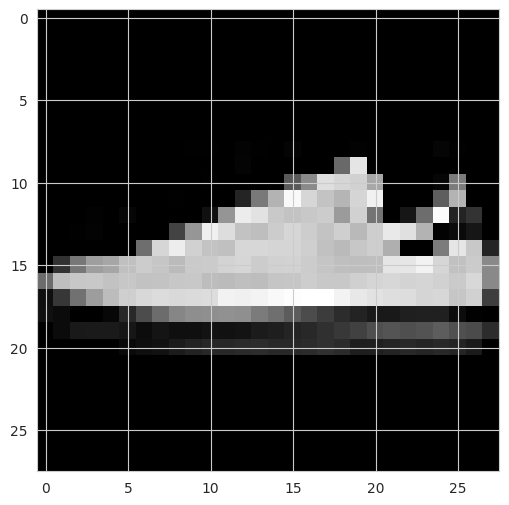

In [8]:
plt.imshow(x_train[6], cmap="gray")
plt.show()

<Axes: >

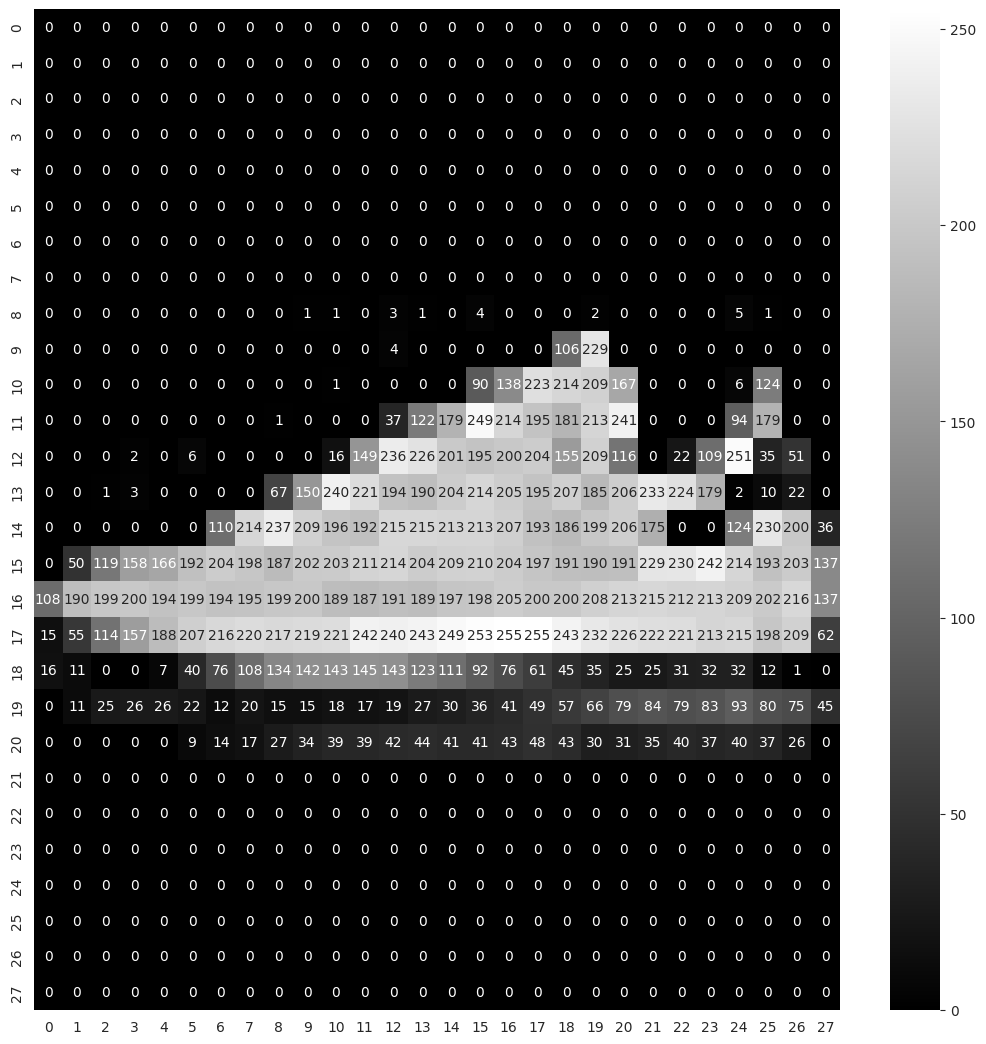

In [9]:
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[6], annot=True, cmap="gray", fmt=".3g")

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
#7-Sneaker
y_train[6]

7

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

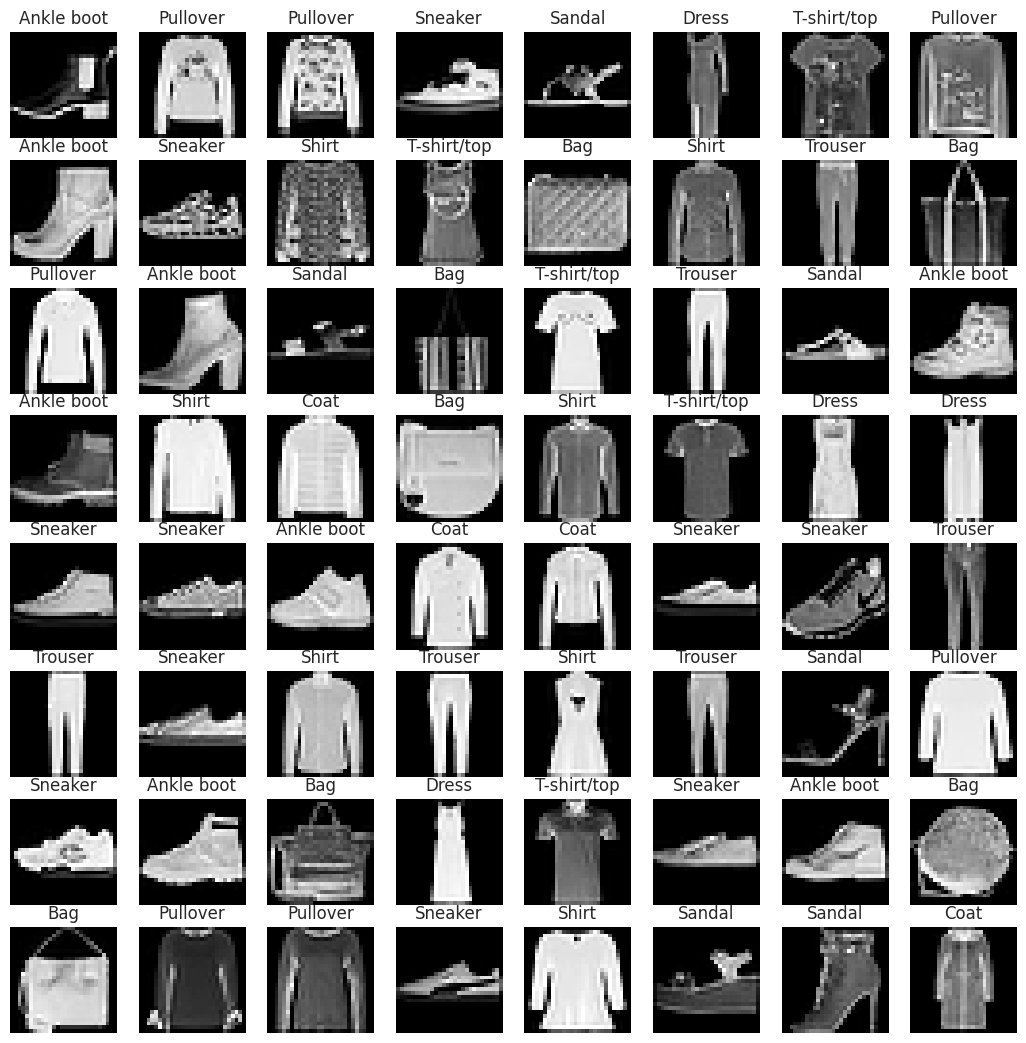

In [13]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index],cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
x_train[6].min()

0

In [15]:
x_train[6].max()

255

In [16]:
# Normalize image pixels

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [17]:
x_train[6].min()

0.0

In [51]:
x_train[6].max()

1.0

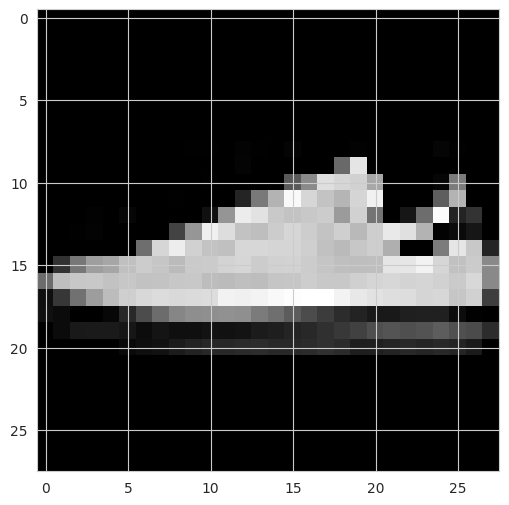

In [19]:
plt.imshow(x_train[6],cmap="gray")
plt.show()

In [20]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
#expand_dims() is used to insert an addition dimension
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [22]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [23]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [28]:
y_train[6]

7

In [29]:
Y_train[6]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2) , strides = (1,1)))  # padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [33]:
# Number of parameter in CL
((3 * 3 * 1) + 1) * 28

280

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [36]:
model.fit(
    x_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3875 - accuracy: 0.8625 - val_loss: 0.3007 - val_accuracy: 0.8908
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2554 - accuracy: 0.9069 - val_loss: 0.2926 - val_accuracy: 0.8957
Epoch 3/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2127 - accuracy: 0.9220 - val_loss: 0.2709 - val_accuracy: 0.9050
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1843 - accuracy: 0.9316 - val_loss: 0.2601 - val_accuracy: 0.9104
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1616 - accuracy: 0.9409 - val_loss: 0.2811 - val_accuracy: 0.9121
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1437 - accuracy: 0.9474 - val_loss: 0.2678 - val_accuracy: 0.9127
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1283 - accuracy: 0.9547 - val_loss: 0.3070 - val_accuracy

In [37]:
x_train.shape

(60000, 28, 28, 1)

In [38]:
Y_train.shape

(60000, 10)

**TASK 7: Plot values of metrics you used in your model.**

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.388,0.862,0.301,0.891
1,0.255,0.907,0.293,0.896
2,0.213,0.922,0.271,0.905
3,0.184,0.932,0.260,0.910
4,0.162,0.941,0.281,0.912


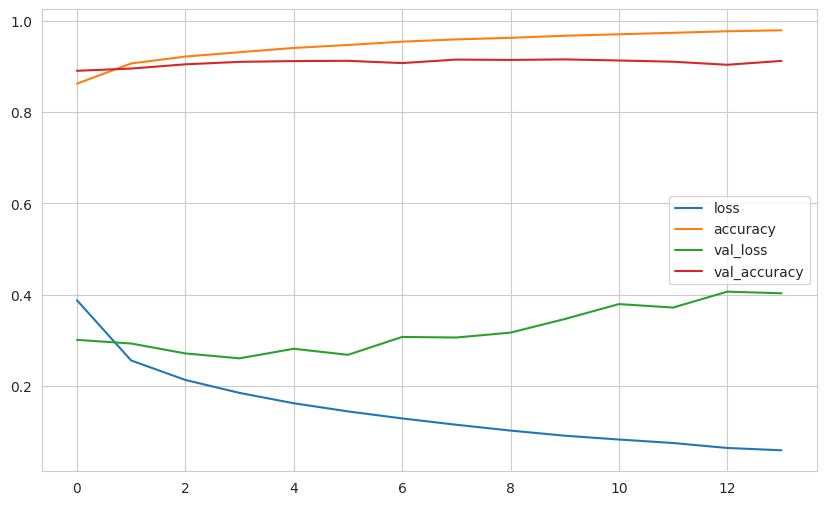

In [40]:
summary.plot();

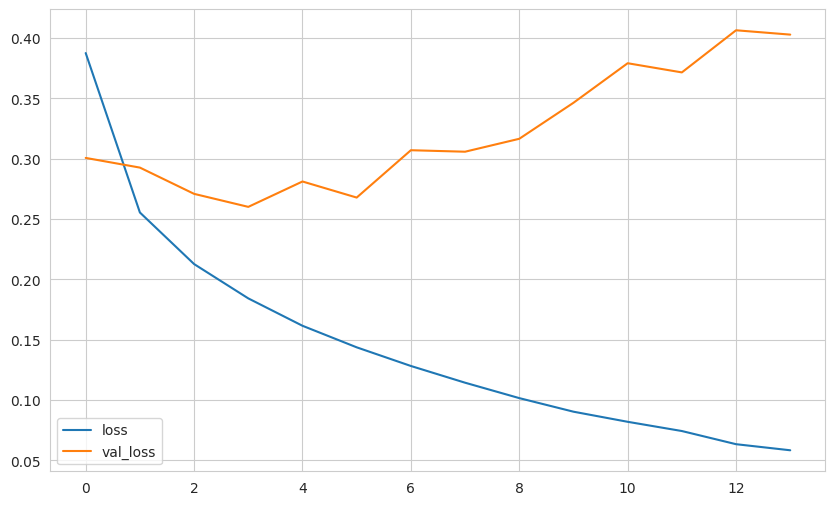

In [41]:
summary[["loss", "val_loss"]].plot();

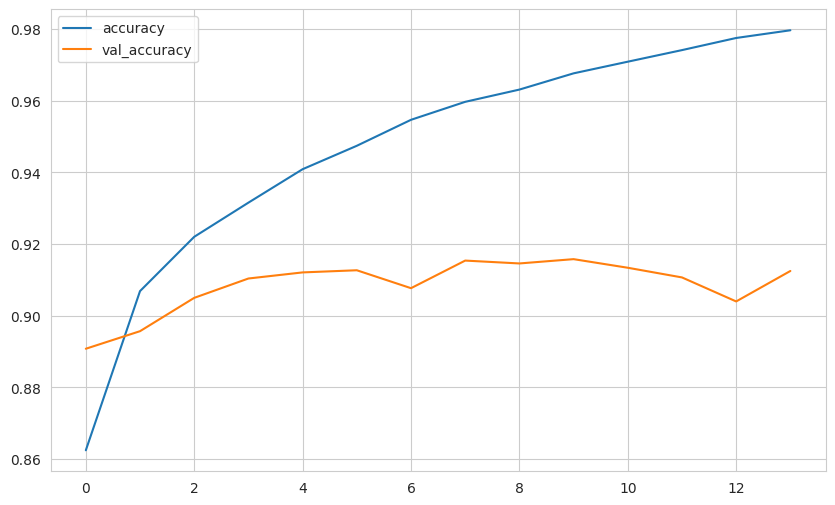

In [42]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [44]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3463 - accuracy: 0.9158


[0.34632328152656555, 0.9157999753952026]

In [45]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.34632328152656555
Test accuracy: 0.9157999753952026


In [54]:
pred_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [56]:
y_pred = np.argmax(pred_prob, axis=1)

In [57]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.89      0.87      1000
           3       0.91      0.93      0.92      1000
           4       0.82      0.90      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.82      0.69      0.75      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000



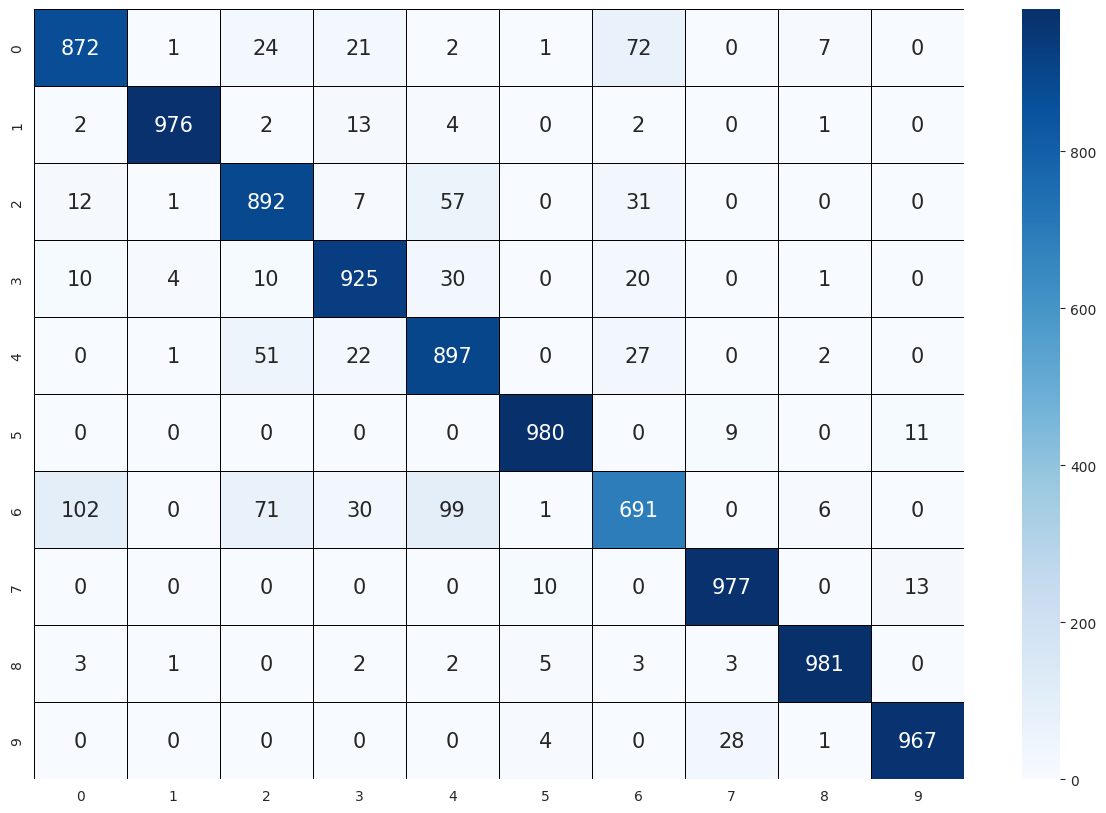

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

## Prediction

In [81]:
my_number = x_test[7]

In [82]:
my_number.shape

(28, 28, 1)

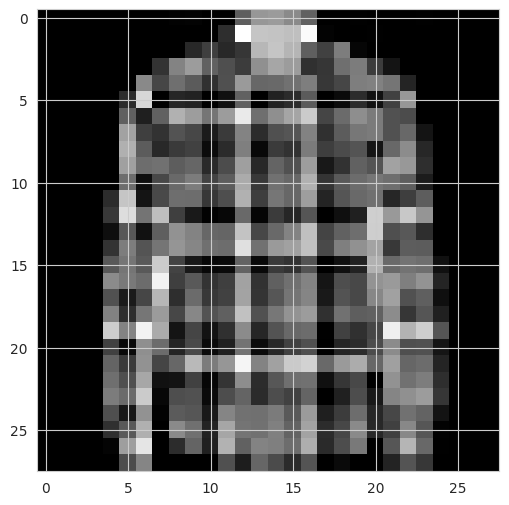

In [83]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [84]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [85]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 47ms/step


array([[3.8730638e-12, 1.4925574e-17, 1.7252164e-09, 5.7984811e-10,
        5.3878480e-06, 4.7151855e-13, 9.9999464e-01, 3.5723419e-17,
        7.9752654e-13, 5.8196497e-23]], dtype=float32)

In [87]:
np.argmax(pred_prob, axis=1)

array([6])

In [88]:
result = np.argmax(pred_prob, axis=1)
result

array([6])

In [89]:
classes[int(result)]

'Shirt'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___